# Linear Regression : 

Linear Regressoin is the most basic and popular algorithm of machine learning. It is supervised machine learning algorithm which is predicted output is real values/continuous. Or, Relationship between input/independent variables and single output/dependent variable. 
We will get linear regression image look like : -

![image](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/800px-Linear_regression.svg.png)

> ## Objective : 

To make a simple linear regression model operating on one variable from scratch using statistical formulas

### Simple Linear Regression
A linear line relationship between one input/independent variable(X) and one output/dependent variable(y).

     y = mX + b
Where, y is dependent/target variable; X is input/independent variable; m is slop of regression line; b is y-intercept.

> ## Approach : 

The model is built in the following steps 

- **Data Wrangling**
- **Data Cleaning : Missing Values** 
- **Visualisation : UniVariate** 
    
      - Histograms
      - Scatter Plot 
      - Boxplot
      
- **Parameter Functions :**
      
      - Mean and Variance
      - Co-Variance
      - Coefficients
      - Splitting Test Data
      
- **Model Building and Predictions**

- **RMSE Function building and calculation**

- **Conclusion**
      - 

## `1.` Data Wrangling

In [9]:
#load all needed libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [10]:
#load data for train and test
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

**TASK : Print the head of train and test data** 

In [11]:
### START CODE (~2 lines of code)
print(train_df.head())
print(test_df.head())
### END CODE

      x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984
    x          y
0  77  79.775152
1  21  23.177279
2  22  25.609262
3  20  17.857388
4  36  41.849864


**TASK : Get the shapes of training and testing data**

In [12]:
### START CODE HERE (~ 2 Lines of code)
print(train_df.shape)
print(test_df.shape)
### END CODE 

(700, 2)
(300, 2)


## `2.` Data Cleaning 

**TASK : Get info about dataset using `info()` method**

In [7]:
### START CODE HERE (~1 Line of code)
print(train_df.info())
print('     ')
print(test_df.info())
### END CODE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB
None
     
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB
None


- **Missing values**

**TASK : Find the numbe of missing values**

In [8]:
### START CODE HERE (~ 2 lines of code)
#In Train set we have null values.
train_df.isna().sum()
### END CODE

x    0
y    1
dtype: int64

**TASK : Remove instances with missing values**

In [9]:
### START CODE HERE (~2 Lines of code)
train_df.dropna(inplace=True)
### END CODE

**TASK : Describe the dataset**

In [10]:
### START CODE HERE (~ 1 Line of code)
train_df.describe()
### END CODE

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


## `3.` Visualization of train dataset

### `3.1` Histograms

**TASK : Plot a `histogram` of train dataset** 

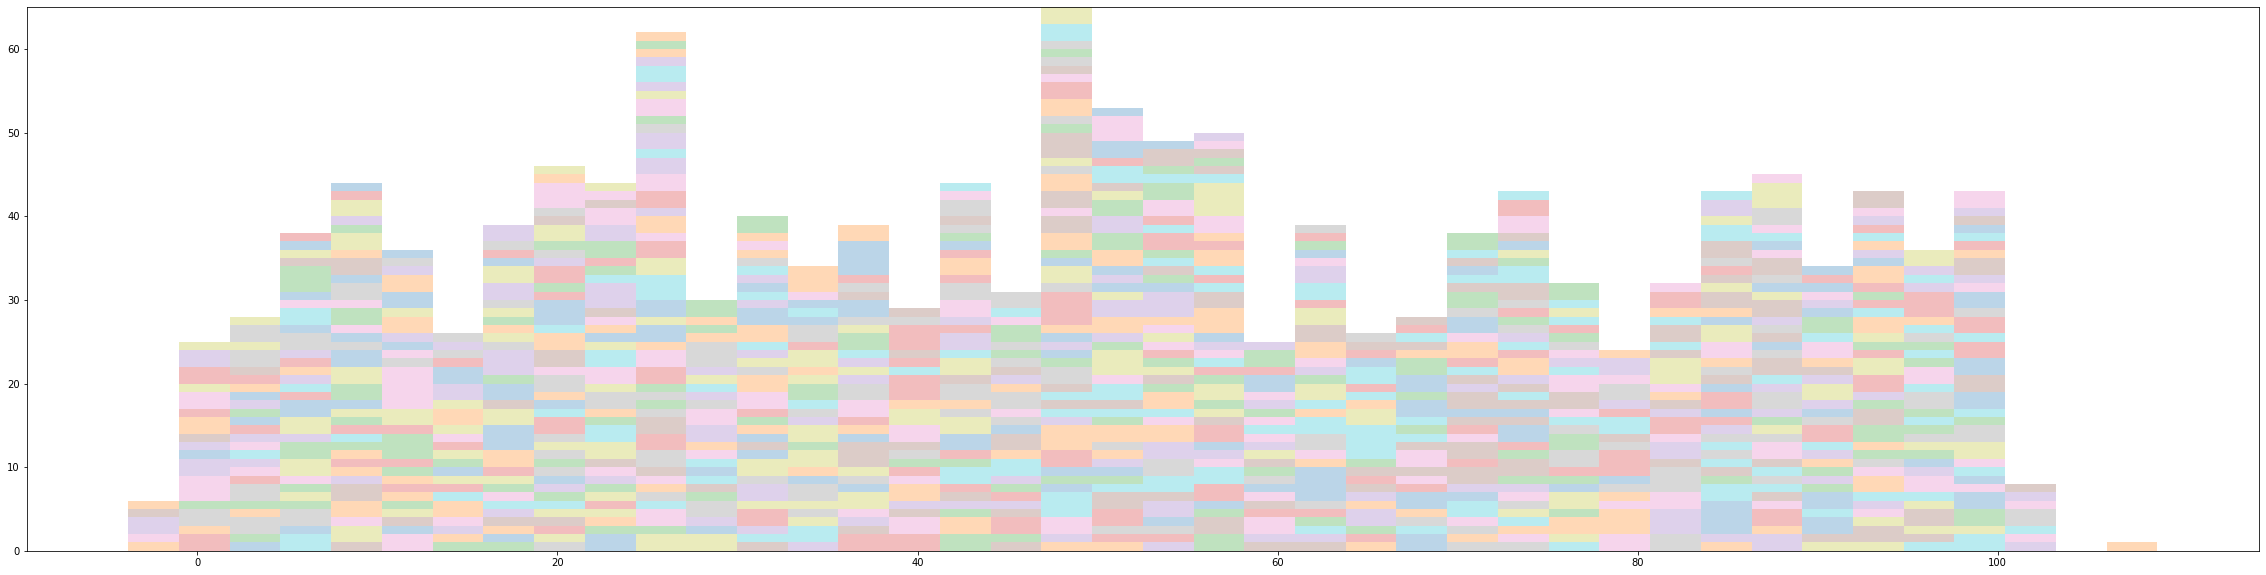

In [11]:
### START CODE HERE (~2 Lines of code)
plt.figure(figsize=(40,10))
plt.hist(train_df,bins=40,histtype='barstacked',alpha=0.3)
plt.show()
### END CODE

### `3.2` Scatter Plot

**TASK : Plot a `scatter plot` between dependent and independent variable**

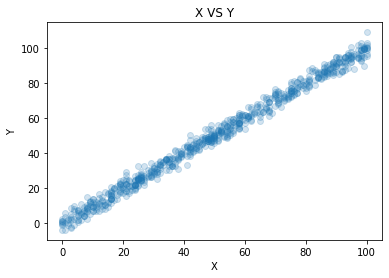

In [12]:
### START CODE HERE (FULL CODE)
## Show Xlabel , Ylabel and Title also
plt.scatter(train_df['x'],train_df['y'],alpha=0.2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X VS Y')
plt.show()
### END CODE

In [13]:
#Observation: Linear regression is very good fit for this problem as per the above graph.

**Analyse if linear regression would be a good fit on this problem** 

### `3.3` Boxplots 

**TASK : Make a `boxplot` of training data**

A better understanding of boxplot would be given by the below image

<img src="https://i2.wp.com/flowingdata.com/wp-content/uploads/2008/02/box-plot-explained.gif?w=1090">

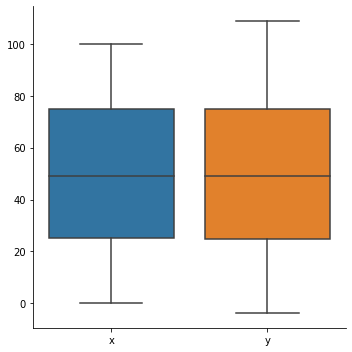

In [14]:
### START CODE HERE (~ 2 Lines of code)
sns.catplot(kind='box',data=train_df)
### END CODE

**TASK : Split the `dependent` and `independent` variable and name them `y` and `X` respectively**

In [18]:
### START CODE HERE (~ 2 Lines of code)
X=train_df['x']
y=train_df['y']
### END CODE

## `4.` Parameter Functions

 Let's find the slop of regression line(m) and bais(y-intercept). you can find these using diffrente approaches. Like:- Ordinary Least Square approach and Gradient Descent approach.
 
- **Ordinary Least Square**
 As you know that the relationship between independent(X) variable and dependent(y) variable is know as linear regression.
 
 **Orinary Least Sqaure** - the sum of the squares of the differences between an observation’s actual and estimated values.
![Regression image](https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2018/06/Least-Square-Method-2-399x300.png) 
Total error of this model is the sum of all errors of each point. ie.

$$SE=\sum_{i=1}^nDi^2$$

    Di = Distance between line and ith point.
    n = Total number of points
### Let's start Implementation
    1. Calculate Mean and Variance
    2. Calculate Covariance.
    3. Estimate Coefficients.
    4. Make prediction
    5. Evaluating Model with RMSE

### `4.1`   Mean and Variance 
Mean of numbers can be calculated as: -

    mean(x) = sum(x) / count(x)

**TASK : Make `functions` for mean and variance**

In [27]:
### START CODE HERE (Write the code where '#' is given) 

#Calculate mean of list numbers with mean function

def mean(x):                               # If required simiarly we can calculate mean for 'y'
    mean_x=x.sum()/x.size  
    return mean_x

print('Mean of X : ', mean(X))


#Calculate varience of list numbers with variance function

def var(x):                                 # If required simiarly we can calculate variance for 'y'
    var_x=sum(((x-x.mean())*(x-x.mean()))/x.size)
    return var_x

print('Variance of X : ', var(X))


### END CODE

Mean of X :  50.01430615164521
Variance of X :  837.1671773082738


**TASK : Find the mean and variance of X and y and store it in `X_mean` , `y_mean` , `X_variance` , `y_variance`**

In [28]:
### START CODE HERE 
X_mean=X.mean()
y_mean=y.mean()
X_variance=X.var()
y_variance=y.var()
### END CODE

### `4.2` Calculate Covariance
covariance can describe the relationship between two or more groups of numbers. It is a generalization of correlation. Correlation describes the relationship between two groups of numbers.
 
you can calculate the covariance between two variables as follows: 
       
       covariance = sum((x(i) - mean(x)) * (y(i) - mean(y)))


**TASK : Create function to implement `co-variance`**

In [56]:
### START CODE HERE (Write code where '#' is given)

#Calculate the covariance of these groups

X=np.array([X])
y=np.array([y])
def covariance(a,b):
    p=a-a.mean()
    q=b-b.mean()
    n=a.size
    return (p*q).sum()/(n-1)
    
print('Covariance of X and Y : ',covariance(X,y))

### END CODE

Covariance of X and Y :  838.9168458155477


### `4.3` Coefficients
Estimate two coefficients in simple linear regression. which is m and b.

    m = covariance() / variance()
    b = mean(y) - (m*mean(X))

**TASK : Make a function `coefficients()` which returns m,b**

In [119]:
### START CODE HERE (Write code where '#' is given) 

#Lets estimate with coefficient
def coefficients(s,t):
    m=covariance(s,t)/s.var()
    b=mean(t)-(m*mean(s))
    return m,b

coefficients(X,y)

print('Slope :',coefficients(X,y)[0],' and Intercept :',coefficients(X,y)[1])


### END CODE

Slope : 1.002089986987903  and Intercept : -0.17896623025333724


you have estimated the coefficients. Now, you can use them to make predictions follows by this eqation: -

       y = mX + b
 

### `4.4` Splitting Test Data 

**TASK : Separate the `Test` dataset into X_test and y_test while reshaping it to (-1,1)**

In [92]:
### START CODE HERE (Write code where '#' is given)
X_test=test_df['x']
X_test_df=pd.DataFrame(X_test)
# similarly write code for y_test
y_test=test_df['y']
y_test_df=pd.DataFrame(y_test)
### END CODE

## `5.` Linear Regression Model and Predictions

**TASK : Make a function to evaluate `linear_regression` with above calculated parameters**

Use the formula Y= mX + c

In [167]:
### START CODE HERE (Write code where '#' is given)

#simple_linear_regression() function making here to prediction
def simple_linear_regression(g,h):
    yhat=[]
    m,b=coefficients(g,h)
    for i in range(len(g)):
        ybar=(coefficients(g,h)[0]*g[i])+coefficients(g,h)[1]
        yhat.append(ybar)
    return yhat  
    
### END CODE

**TASK : Make a line plot of the predictions and a scatter plot of the dataset**

In [168]:
predict = simple_linear_regression(X_test_df['x'],y_test_df['y'])

In [169]:
predict_df=pd.DataFrame(predict)

In [170]:
predict_df.head()

,0
0,77.642012
1,20.839232
2,21.853567
3,19.824896
4,36.054262


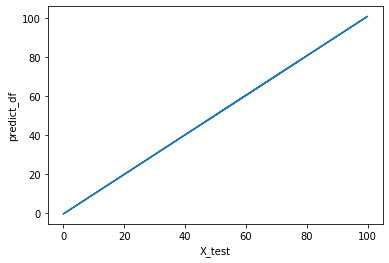

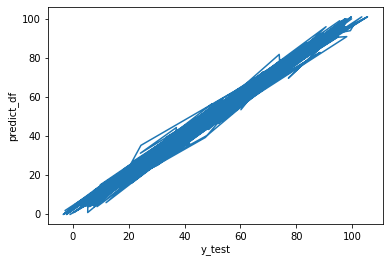

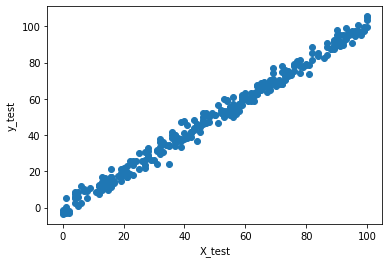

In [326]:
### START CODE HERE (FULL CODE)

# Ploting Line
plt.plot(X_test_df['x'],predict_df)
plt.xlabel('X_test')
plt.ylabel('predict_df')
plt.show()
plt.plot(y_test_df['y'],predict_df)
plt.xlabel('y_test')
plt.ylabel('predict_df')
plt.show()
# Ploting Scatter Points
plt.scatter(X_test,y_test)
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.show()
### END CODE

## `6.` RMSE Function Building and Calculation
We need to find how good is our model. There are many methods to evaluate models. Here we will use **Root Mean Sqare Error** 

**Root Mean Sqare Error** is the square root of the sum of all errors divided by the number of values.
![RMSE](https://cdn-images-1.medium.com/max/800/1*SGBsn7WytmYYbuTgDatIpw.gif)

Here yhat is the ith predicted output values or simply yhat = mX + c


**TASK : Make `Root_mean_square_error` function**

In [318]:
### START CODE HERE (Write code where '#' is given) 
import math
def rmse(a,b):
    m=0
    for i in range(len(b)):
        r=(a[i]-b.iloc[i])**2
        m=m+r
    s=m/len(b)
    e=math.sqrt(s)
    return e

### END CODE 

**TASK : Calculate RMSE using made function**

In [319]:
### START CODE HERE 
rmse(y_test_df['y'],predict_df)
### END CODE 

3.027257481717447

In [320]:
rmse(X_test_df['x'],predict_df)

0.4883064330095101

## Conclusion

In [ ]:
We got that RMSE is less and linear regression model has proved to be best fit for dataframe.